# Henry Markowitz et les quarante portefeuilles 

In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from casadi import *

L’optimisation de portefeuille a pour objectif de définir un choix "optimal" d’investissement d’un capital
dans un ensemble de n actifs. Pour ce faire, on note
$x_i$
l’investissement dans le i-ème actif, de sorte que le
vecteur $x \in \mathbb{R}^n$
 décrit l’allocation globale du portefeuille à travers l’ensemble des actifs. Ceci génère un
rendement $r$ pour l’ensemble du portefeuille, incertain,
dont on cherche à minimiser le risque.

On considère le vecteur $p \in \mathbb{R}^n$ de variation du prix
des actifs sur le long terme, supposé gaussien, de
moyenne $\bar{p}$ et de matrice de covariance $\Sigma$, semi-définie
positive. Pour tenir compte du budget à investir, on a
$$ 1^\top x = 1 \tag{1} $$
où $1^\top$ désigne le vecteur ligne $(1, . . . , 1) \in \mathbb{R}^n$.  Par
ailleurs, pour un rendement 2} $r$ donné, on sait que
$$ \bar{p}^\top x = r \tag{2} $$
et que le risque associé à un investissement $x$ peut
s’exprimer comme sa variance
$$ x^\top \Sigma x \tag{3}$$

## Etude de l’expression d’origine par Markowitz

**Question 1** Dans ce problème, on se donne un budget initial et un ensemble de $n$ actifs dans lesquels on peut investir, dans le but de se constituer un portefeuille financier. On peut normaliser ces investissements, en se fixant un budget normalisé de $1$. On note $(x_1,...,x_n)$ le vecteur des différentes allocations. Si pour $i$ donné on a $x_i$ positif, on espère que l'actif $i$ augmente pour le revendre. Au contraire, si $x_i$ est négatif, on appelle cela une vente à découvert : on espère que l'actif $i$ baisse en valeur pour le racheter, et ainsi avoir une plus-value. 

Avec notre budget normalisé de $1$, on a nécessairement $ \sum_{i = 1}^n x_i = 1$ car on souhaite investir la totalité du budget, et rien de plus. 

L'équation $(2)$ relie un placement $x$ et son rendement attendu $r$ (ou inversement un rendement attendu $r$ et un placement valable $x$, permettant d'espérer obtenir un tel rendement), ceci grâce au vecteur des variations moyennes de prix $\bar{p}$. En effet, en pondérant nos placements par ces facteurs stochastiques, on prévoit la variation (normalisée) de notre capital, c'est-à-dire le rendement de notre portefeuille. 

Enfin, en se donnant un rendement à atteindre $r$, on veut essayer de minimiser le risque que notre rendement réel s'écarte du rendement attendu. Ce risque, c'est la variance liée à $p$, c'est à dire $x^\top \Sigma x$.

**Question 2** On cherche désormais à écrire ce problème comme un problème d'optimisation, sous la forme
$$\min_{c_{eq}(z) = 0} f(z) \tag{4}$$

Ici, c'est le risque lié à la variance et donné par l'équation $(3)$, qu'il faut minimiser, sous les contraintes des équations $(1)$ et $(2)$. 
On a $n$ variables, autant que d'actifs dans lesquels il est possible d'investir. Notre $z$ est évidemment le vecteur $x$ des allocations. Ce qu'on doit minimiser, c'est la fonction $f : x \in \mathbb{R}^n \mapsto x^\top \Sigma x \in \mathbb{R}$.
Les contraintes sont décrites par la fonction $ c_{eq} : x \in \mathbb{R}^n \mapsto (1^\top x -1,  \bar{p}^\top x - r) \in \mathbb{R}^2 $. 

**Question 3** On considère la contrainte supplémentaire $ 1^\top \max(-x,0) \leq s_M \tag{5} $

L'utilisation du max vectoriel permet de ne sélectionner que les investissements négatifs, ou ventes à découvert, ou positions courtes. Ainsi, on somme les ventes à découvert, et on oblige la valeur absolue de cette somme à ne pas dépasser une certaine constante $s_M$ donnée. En faisant cela, le total des allocations d'investissements positifs est au moins de $1-s_M$.

La difficulté est qu'on ajoute ici une contrainte d'inégalité non différentiable.

**Question 4** On introduit $s \in \mathbb{R}^n$, tel que :
$$ s \geq -x, \ \ s\geq 0, \ \ 1^\top s \leq s_M \tag{6}$$

Un tel vecteur vérifie $s \geq \max(-x,0)$ (avec la définition terme à terme). Mais comme la somme des composantes de $s$ est plus petite que $s_M$, à fortiori la somme des composantes de $\max(-x,0)$ est plus petite que $s_M$.
L'existence d'un tel vecteur $s$ nous garantie donc que la contrainte $(5)$ est bien vérifiée. 

Inversement, si la contrainte $(5)$ est vérifiée, alors le vecteur $s$ défini par $s = 1^\top \max(-x,0)$ vérifie bien les contraintes $(6)$. 

Pour ajouter la contrainte d'inégalité $(5)$ au problème d'optimisation initialement décrit à la question 2, on peut donc ajouter un vecteur $s \in \mathbb R^n$ aux variables du problème (c'est-à-dire ajouter n variables supplémentaires), ainsi que les contraintes d'inégalités $(6)$. Ceci revient à redéfinir : 

- la variable $z= \begin{pmatrix} x \\ s \end{pmatrix} \in \mathbb R^{2n}$,
- la fonction de coût $f : \begin{pmatrix} x \\ s \end{pmatrix} \in \mathbb{R}^{2n} \mapsto x^\top \Sigma x \in \mathbb{R}$,
- la contrainte d'égalité $c_{eq} : \begin{pmatrix} x \\ s \end{pmatrix} \in \mathbb{R}^{2n} \mapsto (1^\top x -1,  \bar{p}^\top x - r) \in \mathbb{R}^2$,
- la contrainte d'inégalité $c_{ineq} : \begin{pmatrix} x \\ s \end{pmatrix} \in \mathbb{R}^{2n} \mapsto \begin{pmatrix} s + x \\ s \\ s_M - 1^\top s \end{pmatrix} \in \mathbb R^{2n+1}$

et de résoudre le problème : 

$$ \min_{ \begin{matrix} z\in \mathbb R^{2n}\\ c_{eq}(z)=0,\; c_{ineq}(z)\geq 0 \end{matrix}} f(z)$$

Ceci permet d'intégrer la contrainte d'inégalité tout en conservant le caractère différentiable du problème. 

## Etude numérique du problème de Markowitz

**Question 5** On a ici affaire à un problème d'optimisation quadratique différentiable, sous contraintes de type égalité. Il faut utiliser de la programmation quadratique.

**Question 6** On commence par définir les paramètres d'intérêt, puis la fonction à minimiser, et les contraintes à étudier.

In [3]:
p1 = 0.05
p2 = 0.15
p3 = 0.30
sig1 = 0.10
sig2 = 0.30
sig3 = 0.80
rho = 0.1
r = 0.1
pmoy = np.array([p1,p2,p3])
Sig = np.array([[sig1**2,rho*sig1*sig2,0.],[rho*sig1*sig2,sig2**2,0.],[0.,0.,sig3**2]])
Sig

array([[0.01 , 0.003, 0.   ],
       [0.003, 0.09 , 0.   ],
       [0.   , 0.   , 0.64 ]])

In [4]:
def risque(x):
    ecart = np.matmul(x.T,np.matmul(Sig,x))
    return ecart

In [5]:
uno = np.array([1,1,1])
risque(uno)

0.7460000000000001

In [6]:
def c1(x):
    c = x[0] + x[1] + x[2] - 1
    return c

def c2(x):
    c = pmoy[0]*x[0] + pmoy[1]*x[1] + pmoy[2]*x[2] - r
    return c

In [7]:
c1(uno), c2(uno)

(2, 0.4)

In [8]:
opti = casadi.Opti();
n = 3
x1 = opti.variable(n)
opti.minimize(risque(x1))
opti.subject_to(c1(x1)==0)
opti.subject_to(c2(x1)==0)
x10 = np.array([1/3, 1/3, 1/3])
opti.set_initial(x1,x10)
opti.solver('ipopt');
sol1 = opti.solve();
solx1 = sol1.value(x1)
print(solx1)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        6
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equa

In [9]:
solx1[0] + solx1[1] + solx1[2], pmoy[0]*solx1[0] + pmoy[1]*solx1[1] + pmoy[2]*solx1[2], risque(solx1)

(1.0, 0.1, 0.017067775467775475)

On a bien une solution qui vérifie les contraintes !

**Question 7** On va retester, mais avec $\rho = 0.5$ puis $\rho = -0.5$.

In [10]:
rho2 = 0.5
Sig2 = np.array([[sig1**2,rho2*sig1*sig2,0.],[rho2*sig1*sig2,sig2**2,0.],[0.,0.,sig3**2]])
rho3 = -0.5
Sig3 = np.array([[sig1**2,rho3*sig1*sig2,0.],[rho3*sig1*sig2,sig2**2,0.],[0.,0.,sig3**2]])
Sig, Sig2, Sig3

(array([[0.01 , 0.003, 0.   ],
        [0.003, 0.09 , 0.   ],
        [0.   , 0.   , 0.64 ]]), array([[0.01 , 0.015, 0.   ],
        [0.015, 0.09 , 0.   ],
        [0.   , 0.   , 0.64 ]]), array([[ 0.01 , -0.015,  0.   ],
        [-0.015,  0.09 ,  0.   ],
        [ 0.   ,  0.   ,  0.64 ]]))

In [11]:
def risque2(x):
    ecart = np.matmul(x.T,np.matmul(Sig2,x))
    return ecart

def risque3(x):
    ecart = np.matmul(x.T,np.matmul(Sig3,x))
    return ecart

In [12]:
x2 = opti.variable(n)
opti.minimize(risque2(x2))
opti.subject_to(c1(x2)==0)
opti.subject_to(c2(x2)==0)
x20 = np.array([1/3, 1/3, 1/3])
opti.set_initial(x2,x20)
opti.solver('ipopt');
sol2 = opti.solve();
solx2 = sol2.value(x2)
print(solx2)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:       12
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        6
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        4
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 8

In [13]:
x3 = opti.variable(n)
opti.minimize(risque3(x3))
opti.subject_to(c1(x3)==0)
opti.subject_to(c2(x3)==0)
x30 = np.array([1/3, 1/3, 1/3])
opti.set_initial(x3,x30)
opti.solver('ipopt');
sol3 = opti.solve();
solx3 = sol3.value(x3)
print(solx3)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:       18
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        9
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        6
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 7

In [14]:
solx2[0] + solx2[1] + solx2[2], pmoy[0]*solx2[0] + pmoy[1]*solx2[1] + pmoy[2]*solx2[2], risque2(solx2)

(1.0, 0.09999999999999998, 0.021123595505617987)

In [15]:
solx3[0] + solx3[1] + solx3[2], pmoy[0]*solx3[0] + pmoy[1]*solx3[1] + pmoy[2]*solx3[2], risque3(solx3)

(1.0, 0.1, 0.010392523364485987)

On peut interpréter $\rho$ comme un coefficient de corrélation entre le risque des actifs 1 et 2. Comme on le voit, augmenter $\rho$ revient à placer plus dans l'actif 1 et moins dans le 2, et inversement si $\rho$ diminue (et devient négatif) : s'il est positif, les variations des actifs sont de même signe, et de signe opposé s'il est négatif.
Ainsi, comme on a un risque relatif plus faible sur l'actif  ($\sigma_1 < \sigma_2$), une corrélation positive indique que l'acheteur va placer la majorité de son portefeuille sur l'actif 1. Si, au contraire, elle est négative, alors l'acheteur va diversifier son portefeuille.

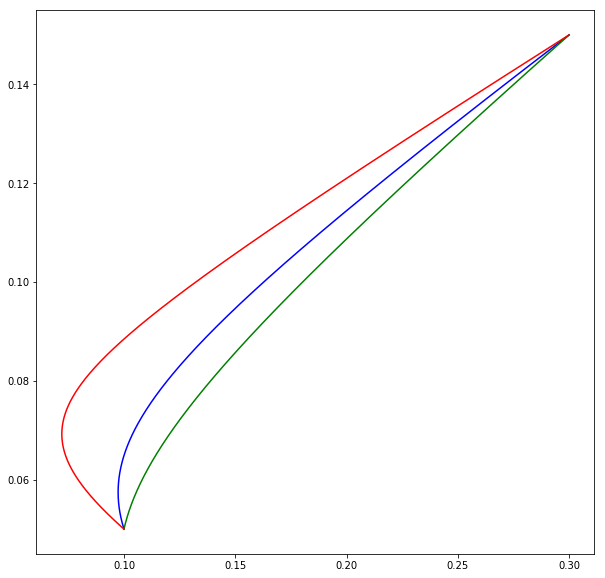

In [116]:
taille = 1001
L = np.linspace(0,1,taille)
M = 1-L
N = np.zeros(taille)
allocs = np.array([L,M,N]).T
rend = np.array([np.dot(pmoy,i) for i in allocs])
risk = np.array([np.sqrt(risque(i)) for i in allocs])
risk2 = np.array([np.sqrt(risque2(i)) for i in allocs])
risk3 = np.array([np.sqrt(risque3(i)) for i in allocs])
plt.figure(figsize=(10,10))
plt.plot(risk,rend,'b')
plt.plot(risk2,rend,'g')
plt.plot(risk3,rend,'r')

On remarque que la courbe rouge ($\rho = -0.5$) est la plus intéressante : à rendement fixé, elle donne le risque le plus bas, et à risque fixé, elle donne le rendement le plus haut. Des actifs corrélés négativement sont la meilleure chose à atteindre.
*Que mettre sur le même graphique : les 3 où x est sur le même intervalle mais $\rho$ change ? Sans doute le plus logique...*

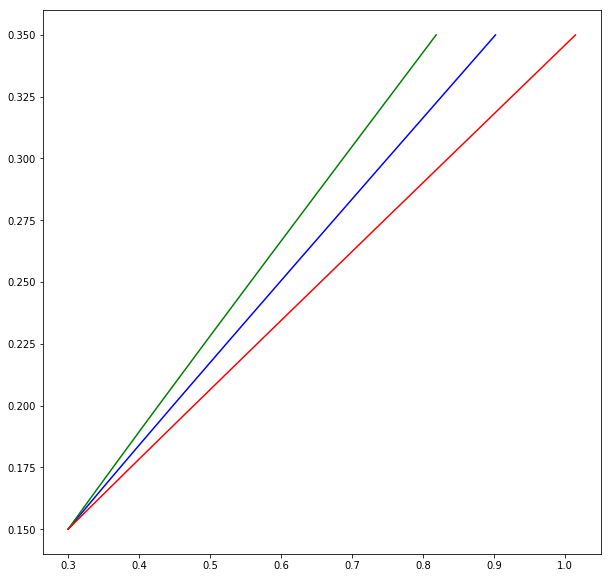

In [117]:
taille2 = 1001
L2 = np.linspace(-2,0,taille2)
M2 = 1-L2
N2 = np.zeros(taille2)
allocs2 = np.array([L2,M2,N2]).T
rend2 = np.array([np.dot(pmoy,i) for i in allocs2])
risk21 = np.array([np.sqrt(risque(i)) for i in allocs2])
risk22 = np.array([np.sqrt(risque2(i)) for i in allocs2])
risk23 = np.array([np.sqrt(risque3(i)) for i in allocs2])
plt.figure(figsize=(10,10))
plt.plot(risk21,rend2,'b')
plt.plot(risk22,rend2,'g')
plt.plot(risk23,rend2,'r')

Ici, on fait des ventes à découvert sur l'actif 1. Cette fois-ci, c'est la corrélation positive qui est la plus intéressante ! Cette stratégie de vendre l'actif 1 à découvert pour acheter de l'actif 2 semble une bonne idée, car génère de bons rendements.

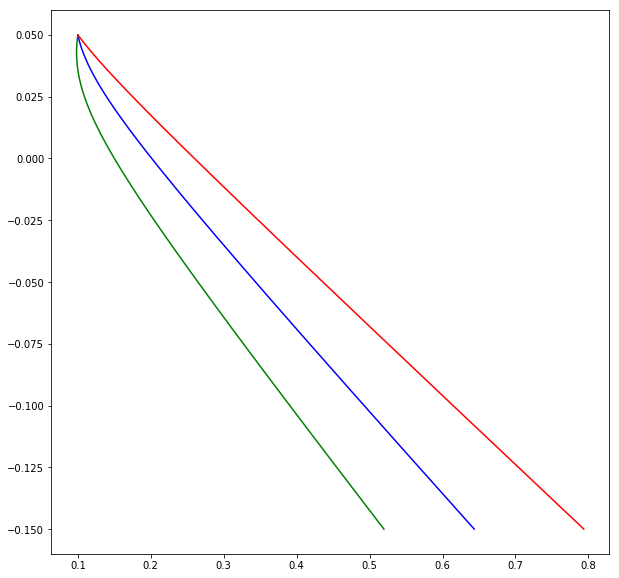

In [118]:
taille3 = 1001
M3 = np.linspace(-2,0,taille3)
L3 = 1-M3
N3 = np.zeros(taille3)
allocs3 = np.array([L3,M3,N3]).T
rend3 = np.array([np.dot(pmoy,i) for i in allocs3])
risk31 = np.array([np.sqrt(risque(i)) for i in allocs3])
risk32 = np.array([np.sqrt(risque2(i)) for i in allocs3])
risk33 = np.array([np.sqrt(risque3(i)) for i in allocs3])
plt.figure(figsize=(10,10))
plt.plot(risk31,rend3,'b')
plt.plot(risk32,rend3,'g')
plt.plot(risk33,rend3,'r')

Dans ce dernier cas, on atteint facilement des rendements négatifs, ce qui n'est pas bien. On vend ici de l'actif 2 à découvert pour acheter de l'actif 1, ce qui se révèle une mauvaise stratégie.

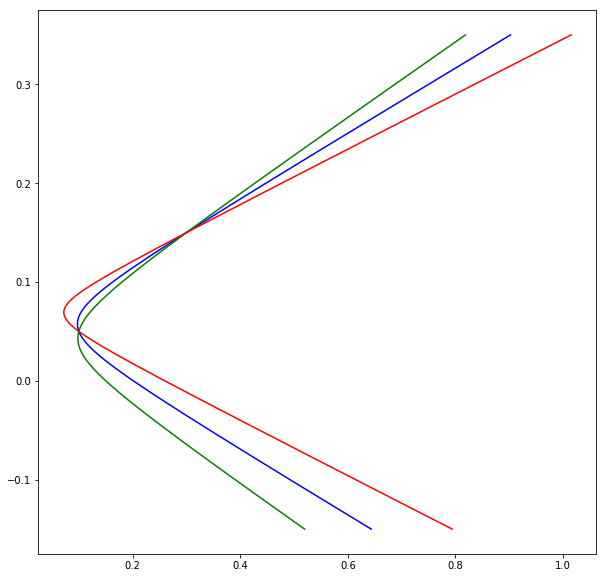

In [119]:
plt.figure(figsize=(10,10))
plt.plot(risk,rend,'b')
plt.plot(risk2,rend,'g')
plt.plot(risk3,rend,'r')
plt.plot(risk21,rend2,'b')
plt.plot(risk22,rend2,'g')
plt.plot(risk23,rend2,'r')
plt.plot(risk31,rend3,'b')
plt.plot(risk32,rend3,'g')
plt.plot(risk33,rend3,'r')

Ci-dessus un petit graphique récapitulatif de nos cas 3 étudiés.

**Question 8** Désormais, on reste avec la corrélation de $0.1$ entre 1 et 2, et on va tenter d'atteindre des rendements de $0.15$ et de $0.2$. On commence par rappeler le résultat de la question 6.

In [19]:
opti = casadi.Opti();
n = 3
x1 = opti.variable(n)
opti.minimize(risque(x1))
opti.subject_to(c1(x1)==0)
opti.subject_to(c2(x1)==0)
x10 = np.array([1/3, 1/3, 1/3])
opti.set_initial(x1,x10)
opti.solver('ipopt');
sol1 = opti.solve();
solx1 = sol1.value(x1)
print(solx1)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        6
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 8

Essayons de plus avec non plus $r = 0.1$, mais $r = 0.15$ et $r= 0.2$.

In [20]:
r2 = 0.15
r3 = 0.2
def c22(x):
    c = pmoy[0]*x[0] + pmoy[1]*x[1] + pmoy[2]*x[2] - r2
    return c
def c23(x):
    c = pmoy[0]*x[0] + pmoy[1]*x[1] + pmoy[2]*x[2] - r3
    return c

In [21]:
opti = casadi.Opti();
n = 3
x4 = opti.variable(n)
opti.minimize(risque(x4))
opti.subject_to(c1(x4)==0)
opti.subject_to(c22(x4)==0)
x40 = np.array([1/3, 1/3, 1/3])
opti.set_initial(x4,x40)
opti.solver('ipopt');
sol4 = opti.solve();
solx4 = sol4.value(x4)
print(solx4)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        6
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 8

In [24]:
opti = casadi.Opti();
n = 3
x5 = opti.variable(n)
opti.minimize(risque(x5))
opti.subject_to(c1(x5)==0)
opti.subject_to(c23(x5)==0)
x50 = np.array([1/3, 1/3, 1/3])
opti.set_initial(x5,x50)
opti.solver('ipopt');
sol5 = opti.solve();
solx5 = sol5.value(x5)
print(solx5)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        6
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 8

On remarque que pour obtenir un rendement plus intéressant que $0.1$, il faut investir plutôt dans l'actif 2 que le 1, et un peu plus dans le 3. Pour en atteindre un de $0.2$, il est même intéressant de vendre à court l'actif 1 pour acheter encore plus de l'actif 2 ! En même temps, celui-ci est risqué, mais il rapporte plus que le premier...

On remarque aussi autre chose. Regardons la moyenne de `solx1` pour le rendement $r = 0.1$, et de `solx5` pour le rendement $r = 0.2$ :

In [25]:
solmoy = (solx1+solx5)/2
solmoy, solx4

(array([0.27505198, 0.54158004, 0.18336798]),
 array([0.27505198, 0.54158004, 0.18336798]))

C'est exact : les allocations pour un rendement de $0.15$, moyenne de $0.1$ et de $0.2$, sont la moyenne de celles pour $0.1$ et $0.2$ ! C'est le *Two-fund theorem*, on peut construire chaque rendement efficace (à risque minimal) à partir de deux portefeuilles efficaces connus.

Si $\sigma_3 = 0$, on suppose que quoi qu'il se passe le rendement relatif à l'actif 3 est de $0.30$. Il s'agit alors de revoir le problème en dimension 2 (avec un système à deux équations simples à résoudre) avec un rendement $r^{'} = r - 0.30$

**Question 9**

In [22]:
sM = 10
r = 0.4

def risque(z):
    x = z[:3]
    return np.matmul(x.T,np.matmul(Sig,x))

def c1(z):
    x = z[:3]
    c = x[0] + x[1] + x[2] - 1
    return c

def c2(z):
    x = z[:3]
    c = pmoy[0]*x[0] + pmoy[1]*x[1] + pmoy[2]*x[2] - r
    return c

def c3(z):
    return z[0] + z[3]

def c4(z):
    return z[1] + z[4]

def c5(z):
    return z[2] + z[5]

def c6(z):
    return z[3]

def c7(z):
    return z[4]

def c8(z):
    return z[5]

def c9(z):
    return sM - z[3] - z[4] - z[5]

opti = casadi.Opti();
n = 6
z = opti.variable(n)
opti.minimize(risque(z))
opti.subject_to(c1(z)==0)
opti.subject_to(c2(z)==0)
opti.subject_to(c3(z)>=0)
opti.subject_to(c4(z)>=0)
opti.subject_to(c5(z)>=0)
opti.subject_to(c6(z)>=0)
opti.subject_to(c7(z)>=0)
opti.subject_to(c8(z)>=0)
opti.subject_to(c9(z)>=0)
z0 = np.array([1/3, 1/3, 1/3, 1/3, 1/3, 1/3])
opti.set_initial(z,z0)
opti.solver('ipopt')
sol = opti.solve()
solz = sol.value(z)
print(solz[:3])

risque(solz)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        6
Number of nonzeros in inequality constraint Jacobian.:       12
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        6
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        7
        inequality constraints with only lower bounds:        7
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 8

0.5928407484407485

On obtient les résultats suivants :
$$\begin{array}{a b c d}
s_M & x_1 & x_2 & x_3 & \text{risk} \\
\hline
100 & -1.51 & 1.86 & 0.66 & 0.59 \\
10 & -1.51 & 1.86 & 0.66 & 0.59 \\
1 & -1.00 & 1.00 & 1.00 & 0.73 \\
0.7 & -0.70 & 0.50 & 1.20 & 0.95 \\
0.5 & -0.50 & 0.17 & 1.30 & 1.14 \\
0.4 & -0.40 & 0.00 & 1.40 & 1.25 \\
\end{array}$$

En l'absence de contrainte sur les positions courtes ($s_M = 100$), le rendement élevé $r=0.4$ impose une prise de risque plutot élevée et des positions courtes importantes sur le premier actif. 
En ajoutant une contrainte croissante sur les positions courtes ($1 > s_M > 0.4$), on est forcé à prendre des risques encore plus importants et on limite la prise de positions courtes sur le premier actif. 

## Expression comme un problème bi-objectif : Bonus time in finance

**Question 10** On cherche maintenant à minimiser le critère suivant

$$ -\bar{p}^\top x + \mu x^\top \Sigma x \tag{7} $$

On cherche ici à minimiser le risque moins le rendement, donc à maximiser le rendement moins le risque ! Dans le cas $\mu = 0$, il s'agit de minimiser simplement $-\bar{p}^\top x$ ; soit de maximiser le rendement $r$ ! Cependant, on se retrouve alors avec un problème qui n'a sans doute même pas de solution ici...

Si les $x_i$ sont contraints à être positifs :
* Dans le cas où $\mu = 0$, il faut maximiser le rendement. On place alors l'entièreté des allocations sur l'actif qui rapporte le plus. On a ici affaire à un investisseur qui joue gros !
* Dans le cas où $\mu \to +\infty$, peu importe le rendement, il s'agit de rendre le risque minimal voire nul. On a cette fois affaire à un investisseur prudent, qui veut être sûr de son coup.

Testons nos hypothèses.

In [71]:
def rendrisque(x,mu):
    ec = -(pmoy[0]*x[0]+pmoy[1]*x[1]+pmoy[2]*x[2]) + mu*np.matmul(x.T,np.matmul(Sig,x))
    return ec

In [72]:
munul = 0.001
opti = casadi.Opti();
n = 3
y1 = opti.variable(n)
opti.minimize(rendrisque(y1,munul))
opti.subject_to(c1(y1)==0)
y10 = np.array([1/3, 1/3, 1/3])
opti.set_initial(y1,y10)
opti.solver('ipopt');
solmu1 = opti.solve();
soly1 = solmu1.value(y1)
print(soly1)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        3
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -

In [73]:
soly1[0] + soly1[1] + soly1[2], pmoy[0]*soly1[0] + pmoy[1]*soly1[1] + pmoy[2]*soly1[2], risque(soly1)

(1.0, 98.54422204386493, 49241.627004307855)

On peut modifier à son gré la valeur de $mu$ pour la rapprocher de 0, mais cela pourrait diverger. On n'a en effet pas contraint les ventes courtes, ce qui occasionne une énorme vente à découvert de l'actif 1, sans prendre gare au risque, dans l'objectif d'acheter beaucoup des actifs 2 et 3, pour gagner plus ! Le rendement est en effet gigantesque, mais quel risque démesuré !

In [74]:
mugrand = 10000000
opti = casadi.Opti();
n = 3
y2 = opti.variable(n)
opti.minimize(rendrisque(y2,mugrand))
opti.subject_to(c1(y2)==0)
y20 = np.array([1/3, 1/3, 1/3])
opti.set_initial(y2,y20)
opti.solver('ipopt');
solmu2 = opti.solve();
soly2 = solmu2.value(y2)
print(soly2)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        3
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 8

In [75]:
soly2[0] + soly2[1] + soly2[2], pmoy[0]*soly2[0] + pmoy[1]*soly2[1] + pmoy[2]*soly2[2], risque(soly2)

(1.0, 0.06098672587263111, 0.009340387544840055)

L'investissement dans l'actif 1 est le moins risqué : d'où le fort investisssement de ce portefeuille dans le premier actif. Le rendement est moindre certes, mais le risque minimal !

**Question 11** *A faire : je dirais que c'est si on s'occupe de chaque terme de l'expression séparément ? Jsp*

**Question 12** Or, en pratique, on ne peut qu'estimer $\sigma$, tout en disposant cependant d'une batterie d'estimations de celle_ci, les $\hat{\Sigma}_k$, avec ici $k \in [1,6]$. On cherche alors à minimiser

$$ -\bar{p}^\top x + \mu \max_{k \in [1,6]} x^\top \hat{\Sigma}_k x \tag{8} $$

Ce problème n'est cependant, à cause de la présence du $\max$, pas différentiable ! On peut alors appliquer un algorithme comme celui du gradient proximal à la fonction

$$ \max_{k \in [1,6]} (-\bar{p}^\top x + \mu  x^\top \hat{\Sigma}_k x) $$

In [76]:
rho4 = -0.1
Sig4 = np.array([[sig1**2,rho4*sig1*sig2,0.],[rho4*sig1*sig2,sig2**2,0.],[0.,0.,sig3**2]])
rho5 = 0.0
Sig5 = np.array([[sig1**2,rho5*sig1*sig2,0.],[rho5*sig1*sig2,sig2**2,0.],[0.,0.,sig3**2]])
rho6 = 0.2
Sig6 = np.array([[sig1**2,rho6*sig1*sig2,0.],[rho6*sig1*sig2,sig2**2,0.],[0.,0.,sig3**2]])
print(Sig, Sig2, Sig3, Sig4, Sig5, Sig6)

[[0.01  0.003 0.   ]
 [0.003 0.09  0.   ]
 [0.    0.    0.64 ]] [[0.01  0.015 0.   ]
 [0.015 0.09  0.   ]
 [0.    0.    0.64 ]] [[ 0.01  -0.015  0.   ]
 [-0.015  0.09   0.   ]
 [ 0.     0.     0.64 ]] [[ 0.01  -0.003  0.   ]
 [-0.003  0.09   0.   ]
 [ 0.     0.     0.64 ]] [[0.01 0.   0.  ]
 [0.   0.09 0.  ]
 [0.   0.   0.64]] [[0.01  0.006 0.   ]
 [0.006 0.09  0.   ]
 [0.    0.    0.64 ]]


In [77]:
def rendrisque_max(x,mu):
    ec1 = -(pmoy[0]*x[0]+pmoy[1]*x[1]+pmoy[2]*x[2]) + mu*np.matmul(x.T,np.matmul(Sig,x))
    ec2 = -(pmoy[0]*x[0]+pmoy[1]*x[1]+pmoy[2]*x[2]) + mu*np.matmul(x.T,np.matmul(Sig2,x))
    ec3 = -(pmoy[0]*x[0]+pmoy[1]*x[1]+pmoy[2]*x[2]) + mu*np.matmul(x.T,np.matmul(Sig3,x))
    ec4 = -(pmoy[0]*x[0]+pmoy[1]*x[1]+pmoy[2]*x[2]) + mu*np.matmul(x.T,np.matmul(Sig4,x))
    ec5 = -(pmoy[0]*x[0]+pmoy[1]*x[1]+pmoy[2]*x[2]) + mu*np.matmul(x.T,np.matmul(Sig5,x))
    ec6 = -(pmoy[0]*x[0]+pmoy[1]*x[1]+pmoy[2]*x[2]) + mu*np.matmul(x.T,np.matmul(Sig6,x))
    max1 = casadi.fmax(ec1,ec2)
    max2 = casadi.fmax(max1,ec3)
    max3 = casadi.fmax(max2,ec4)
    max4 = casadi.fmax(max3,ec5)
    max5 = casadi.fmax(max4,ec6)
    return max5

In [78]:
mubas = 20
opti = casadi.Opti();
n = 3
z1 = opti.variable(n)
opti.minimize(rendrisque_max(z1,mubas))
opti.subject_to(c1(z1)==0)
z10 = np.array([1/3, 1/3, 1/3])
opti.set_initial(z1,z10)
opti.solver('ipopt');
solmumax1 = opti.solve();
solz1 = solmumax1.value(z1)
print(solz1)

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        3
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 1

RuntimeError: Error in Opti::solve [OptiNode] at .../casadi/core/optistack.cpp:159:
.../casadi/core/optistack_internal.cpp:999: Assertion "return_success(accept_limit)" failed:
Solver failed. You may use opti.debug.value to investigate the latest values of variables. return_status is 'Restoration_Failed'

On peut cependant, sans algorithme, déterminer explicitement la solution à notre problème ! On va pour cela utiliser une méthode analytique. Définissons le lagrangien lié au problème $(4)$ avec objectif $(7)$.

$$ \mathcal{L}(x,\lambda) = -\bar{p}^\top x + \mu  x^\top \Sigma x + \lambda (1^\top x - 1) $$

avec $\lambda$ qui est dans $\mathbb{R}$.
Cherchons un point stationnaire de $\mathcal{L}.$
* $ 0 = \frac{\partial \mathcal{L}}{\partial x} = -\bar{p} + 2\mu \Sigma x + \lambda 1 $
* $ 0 = \frac{\partial \mathcal{L}}{\partial \lambda} = 1^\top x - 1 $
On en tire :

$$ x = \frac{1}{2\mu}\Sigma^{-1} (\bar{p} - \lambda 1) $$

par la première condition. En réinjectant dans la deuxième, et en isolant $\lambda$, on trouve pour $\lambda$ :

$$ \lambda = \frac{1^\top \Sigma^{-1} \bar{p} - 2\mu}{1^\top \Sigma^{-1} 1} $$

On peut donc trouver la valeur explicite solution du problème, $x^{*}_{\mu}$ (qui dépend cependant de $\mu$), en résolvant d'abord $\lambda$, puis $x^{*}_{\mu}$.

In [81]:
uno = np.array([1,1,1])

def sol_xmustar(mu,Sigma):
    lam = (np.matmul(uno.T,np.matmul(np.linalg.inv(Sigma),pmoy))-2*mu)/(np.matmul(uno.T,np.matmul(np.linalg.inv(Sigma),uno)))
    xsol = ((1)/(2*mu))*np.matmul(np.linalg.inv(Sigma),(pmoy-lam*uno))
    return xsol
    

In [88]:
sol_xmustar(0.1,Sig) # Test

array([-6.13536224,  5.2534766 ,  1.88188564])

In [98]:
muarrtest = np.linspace(0,100,1001)
muarr = muarrtest[1:]
xsolarrestim1 = np.array([sol_xmustar(mu,Sig) for mu in muarr])
xsolarrestim2 = np.array([sol_xmustar(mu,Sig2) for mu in muarr])
xsolarrestim3 = np.array([sol_xmustar(mu,Sig3) for mu in muarr])
xsolarrestim4 = np.array([sol_xmustar(mu,Sig4) for mu in muarr])
xsolarrestim5 = np.array([sol_xmustar(mu,Sig5) for mu in muarr])
xsolarrestim6 = np.array([sol_xmustar(mu,Sig6) for mu in muarr])
xvrai = xsolarrestim1

In [99]:
def risque4(x):
    ecart = np.matmul(x.T,np.matmul(Sig4,x))
    return ecart

def risque5(x):
    ecart = np.matmul(x.T,np.matmul(Sig5,x))
    return ecart

def risque6(x):
    ecart = np.matmul(x.T,np.matmul(Sig6,x))
    return ecart


In [102]:
riskestim1 = np.array([np.sqrt(risque(i)) for i in xsolarrestim1])
riskestim2 = np.array([np.sqrt(risque2(i)) for i in xsolarrestim2])
riskestim3 = np.array([np.sqrt(risque3(i)) for i in xsolarrestim3])
riskestim4 = np.array([np.sqrt(risque4(i)) for i in xsolarrestim4])
riskestim5 = np.array([np.sqrt(risque5(i)) for i in xsolarrestim5])
riskestim6 = np.array([np.sqrt(risque6(i)) for i in xsolarrestim6])
riskreal1 = np.array([np.sqrt(risque(i)) for i in xsolarrestim1])
riskreal2 = np.array([np.sqrt(risque(i)) for i in xsolarrestim2])
riskreal3 = np.array([np.sqrt(risque(i)) for i in xsolarrestim3])
riskreal4 = np.array([np.sqrt(risque(i)) for i in xsolarrestim4])
riskreal5 = np.array([np.sqrt(risque(i)) for i in xsolarrestim5])
riskreal6 = np.array([np.sqrt(risque(i)) for i in xsolarrestim6])
riskfinal = np.array([np.sqrt(risque(i)) for i in xsolarrestim1])

rendestim1 = np.array([np.dot(pmoy,i) for i in xsolarrestim1])
rendestim2 = np.array([np.dot(pmoy,i) for i in xsolarrestim2])
rendestim3 = np.array([np.dot(pmoy,i) for i in xsolarrestim3])
rendestim4 = np.array([np.dot(pmoy,i) for i in xsolarrestim4])
rendestim5 = np.array([np.dot(pmoy,i) for i in xsolarrestim5])
rendestim6 = np.array([np.dot(pmoy,i) for i in xsolarrestim6])
rendfinal = np.array([np.dot(pmoy,i) for i in xsolarrestim1])

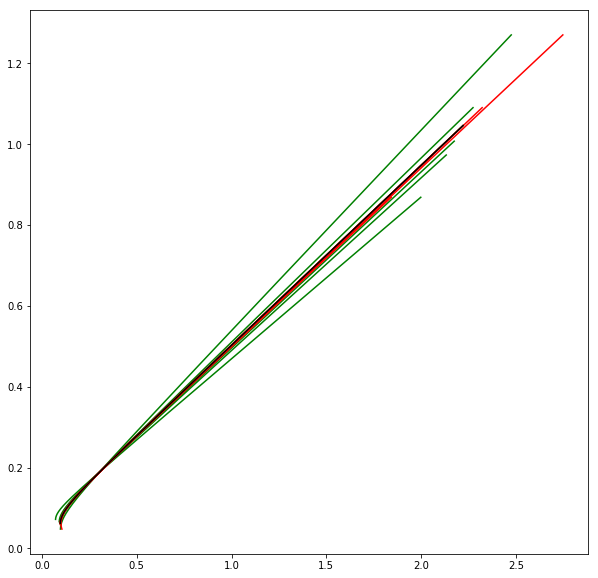

In [115]:
plt.figure(figsize=(10,10))
plt.plot(riskestim1,rendestim1,'g')
plt.plot(riskestim2,rendestim2,'g')
plt.plot(riskestim3,rendestim3,'g')
plt.plot(riskestim4,rendestim4,'g')
plt.plot(riskestim5,rendestim5,'g')
plt.plot(riskestim6,rendestim6,'g')
plt.plot(riskreal1,rendestim1,'r')
plt.plot(riskreal2,rendestim2,'r')
plt.plot(riskreal3,rendestim3,'r')
plt.plot(riskreal4,rendestim4,'r')
plt.plot(riskreal5,rendestim5,'r')
plt.plot(riskreal6,rendestim6,'r')
plt.plot(riskfinal,rendfinal,'k')

On a ici les frontières estimées (en vert), réalisées (en rouge) et efficiente (en noir). Certaines frontières estimées semblent donner de meilleurs rendements à risque égal, mais elles ne sont jamais réalisées ! Quant aux frontières réalisées, elles sont proches de la frontière efficiente, mais se retrouvent plus basses (car les $x_{k}$ ne sont pas les meilleures allocations, contrairement aux $x$ réels qui le sont) : elles proposent donc un rendement légèrement plus faible pour un risque égal.

Pour finir, essayons d'estimer réellement 6 valeurs de $(\bar{p},\Sigma)$. Pour estimer $\bar{p}$, nous allons poser simplement à partir de $N_k$ estimations le vecteur $\hat{p}_k$ tel que :

$$ \hat{p}_k = \frac{1}{N_k} \sum_{i = 1}^{N_k} p_{k,i} $$

Quant à sa variance, on va l'estimer à partir de la matrice $\hat{\Sigma}_k$ telle que :

$$ \hat{\Sigma}_k = \frac{1}{N_k - 1} \sum_{i = 1}^{N_k} (p_{k,i} - \hat{p}_k) \cdot (p_{k,i} - \hat{p}_k)^\top  $$

In [171]:
def moyvect(plist):
    N = len(plist)
    s = 0
    for i in plist:
        s+=i
    moy = s/N
    return moy

def varvect(plist):
    N = len(plist)
    p = moyvect(plist)
    s = np.zeros((3,3))
    for i in range(N):
        s+=np.outer((plist[i]-p),(plist[i]-p).T)
    var = (1/(N-1))*s
    return var

In [172]:
pmoy
Sig
test1 = np.random.multivariate_normal(pmoy,Sig,25)
test2 = np.random.multivariate_normal(pmoy,Sig,50)
test3 = np.random.multivariate_normal(pmoy,Sig,100)
test4 = np.random.multivariate_normal(pmoy,Sig,25)
test5 = np.random.multivariate_normal(pmoy,Sig,50)
test6 = np.random.multivariate_normal(pmoy,Sig,100)
pmoy1 = moyvect(test1)
pmoy2 = moyvect(test2)
pmoy3 = moyvect(test3)
pmoy4 = moyvect(test4)
pmoy5 = moyvect(test5)
pmoy6 = moyvect(test6)
pmoy, pmoy1, pmoy2, pmoy3, pmoy4, pmoy5, pmoy6

(array([0.05, 0.15, 0.3 ]),
 array([0.04298608, 0.06879075, 0.4531452 ]),
 array([0.06861952, 0.14778106, 0.28201243]),
 array([0.05280321, 0.14826472, 0.34084671]),
 array([0.05585429, 0.14805483, 0.38707117]),
 array([0.034035  , 0.12138513, 0.38440231]),
 array([0.04120675, 0.18324861, 0.35517996]))

In [173]:
Var1 = varvect(test1)
Var2 = varvect(test2)
Var3 = varvect(test3)
Var4 = varvect(test4)
Var5 = varvect(test5)
Var6 = varvect(test6)
Var1, Var2, Var3, Var4, Var5, Var6

(array([[ 0.00651502,  0.00270547, -0.0031223 ],
        [ 0.00270547,  0.12394972,  0.01542383],
        [-0.0031223 ,  0.01542383,  0.52378441]]),
 array([[ 0.01335829,  0.00526907, -0.00323004],
        [ 0.00526907,  0.10292332,  0.07743901],
        [-0.00323004,  0.07743901,  0.79812562]]),
 array([[ 0.00919358,  0.00307136, -0.00746153],
        [ 0.00307136,  0.11123997,  0.00770308],
        [-0.00746153,  0.00770308,  0.59464836]]),
 array([[ 0.01351278, -0.00139891, -0.02266579],
        [-0.00139891,  0.0556764 ,  0.02138052],
        [-0.02266579,  0.02138052,  0.53196869]]),
 array([[ 1.07985485e-02, -4.14542972e-04,  2.40094931e-02],
        [-4.14542972e-04,  8.15933369e-02,  3.81073024e-03],
        [ 2.40094931e-02,  3.81073024e-03,  5.29324848e-01]]),
 array([[ 0.01245761,  0.00630642, -0.00689332],
        [ 0.00630642,  0.08766308,  0.0175351 ],
        [-0.00689332,  0.0175351 ,  0.6616008 ]]))

In [174]:
def sol_xmustarp(mu,Sigma,ppar):
    lam = (np.matmul(uno.T,np.matmul(np.linalg.inv(Sigma),ppar))-2*mu)/(np.matmul(uno.T,np.matmul(np.linalg.inv(Sigma),uno)))
    xsol = ((1)/(2*mu))*np.matmul(np.linalg.inv(Sigma),(ppar-lam*uno))
    return xsol
    

In [175]:
muarrtest = np.linspace(0,100,1001)
muarr = muarrtest[1:]
xsolarrestimrand1 = np.array([sol_xmustarp(mu,Var1,pmoy1) for mu in muarr])
xsolarrestimrand2 = np.array([sol_xmustarp(mu,Var2,pmoy2) for mu in muarr])
xsolarrestimrand3 = np.array([sol_xmustarp(mu,Var3,pmoy3) for mu in muarr])
xsolarrestimrand4 = np.array([sol_xmustarp(mu,Var4,pmoy4) for mu in muarr])
xsolarrestimrand5 = np.array([sol_xmustarp(mu,Var5,pmoy5) for mu in muarr])
xsolarrestimrand6 = np.array([sol_xmustarp(mu,Var6,pmoy6) for mu in muarr])
xvrai = xsolarrestim1

In [176]:
def risquerand1(x):
    ecart = np.matmul(x.T,np.matmul(Var1,x))
    return ecart

def risquerand2(x):
    ecart = np.matmul(x.T,np.matmul(Var2,x))
    return ecart

def risquerand3(x):
    ecart = np.matmul(x.T,np.matmul(Var3,x))
    return ecart

def risquerand4(x):
    ecart = np.matmul(x.T,np.matmul(Var4,x))
    return ecart

def risquerand5(x):
    ecart = np.matmul(x.T,np.matmul(Var5,x))
    return ecart

def risquerand6(x):
    ecart = np.matmul(x.T,np.matmul(Var6,x))
    return ecart

In [177]:
riskestimrand1 = np.array([np.sqrt(risquerand1(i)) for i in xsolarrestimrand1])
riskestimrand2 = np.array([np.sqrt(risquerand2(i)) for i in xsolarrestimrand2])
riskestimrand3 = np.array([np.sqrt(risquerand3(i)) for i in xsolarrestimrand3])
riskestimrand4 = np.array([np.sqrt(risquerand4(i)) for i in xsolarrestimrand4])
riskestimrand5 = np.array([np.sqrt(risquerand5(i)) for i in xsolarrestimrand5])
riskestimrand6 = np.array([np.sqrt(risquerand6(i)) for i in xsolarrestimrand6])
riskrealrand1 = np.array([np.sqrt(risque(i)) for i in xsolarrestimrand1])
riskrealrand2 = np.array([np.sqrt(risque(i)) for i in xsolarrestimrand2])
riskrealrand3 = np.array([np.sqrt(risque(i)) for i in xsolarrestimrand3])
riskrealrand4 = np.array([np.sqrt(risque(i)) for i in xsolarrestimrand4])
riskrealrand5 = np.array([np.sqrt(risque(i)) for i in xsolarrestimrand5])
riskrealrand6 = np.array([np.sqrt(risque(i)) for i in xsolarrestimrand6])
riskfinal = np.array([np.sqrt(risque(i)) for i in xvrai])

rendestimrand1 = np.array([np.dot(pmoy1,i) for i in xsolarrestimrand1])
rendestimrand2 = np.array([np.dot(pmoy2,i) for i in xsolarrestimrand2])
rendestimrand3 = np.array([np.dot(pmoy3,i) for i in xsolarrestimrand3])
rendestimrand4 = np.array([np.dot(pmoy4,i) for i in xsolarrestimrand4])
rendestimrand5 = np.array([np.dot(pmoy5,i) for i in xsolarrestimrand5])
rendestimrand6 = np.array([np.dot(pmoy6,i) for i in xsolarrestimrand6])
rendrealrand1 = np.array([np.dot(pmoy,i) for i in xsolarrestimrand1])
rendrealrand2 = np.array([np.dot(pmoy,i) for i in xsolarrestimrand2])
rendrealrand3 = np.array([np.dot(pmoy,i) for i in xsolarrestimrand3])
rendrealrand4 = np.array([np.dot(pmoy,i) for i in xsolarrestimrand4])
rendrealrand5 = np.array([np.dot(pmoy,i) for i in xsolarrestimrand5])
rendrealrand6 = np.array([np.dot(pmoy,i) for i in xsolarrestimrand6])

rendfinal = np.array([np.dot(pmoy,i) for i in xvrai])

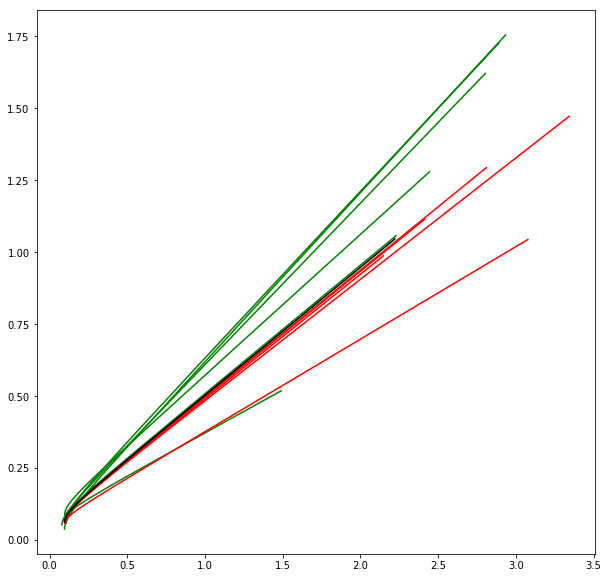

In [178]:
plt.figure(figsize=(10,10))
plt.plot(riskestimrand1,rendestimrand1,'g')
plt.plot(riskestimrand2,rendestimrand2,'g')
plt.plot(riskestimrand3,rendestimrand3,'g')
plt.plot(riskestimrand4,rendestimrand4,'g')
plt.plot(riskestimrand5,rendestimrand5,'g')
plt.plot(riskestimrand6,rendestimrand6,'g')
plt.plot(riskrealrand1,rendrealrand1,'r')
plt.plot(riskrealrand2,rendrealrand2,'r')
plt.plot(riskrealrand3,rendrealrand3,'r')
plt.plot(riskrealrand4,rendrealrand4,'r')
plt.plot(riskrealrand5,rendrealrand5,'r')
plt.plot(riskrealrand6,rendrealrand6,'r')
plt.plot(riskfinal,rendfinal,'k')

On a le même type de résultats qu'avant mais encore plus extravagants : c'est normal, on n'a pas cette fois-ci imposé nos valeurs ! Mais les mêmes observations que juste avant sont applicables.